In [23]:
import pandas as pd
import numpy as np


In [24]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer



In [25]:
df=pd.read_csv(r"C:\Users\KIIT0001\Downloads\train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.dropna(inplace=True)
df.shape

(714, 3)

In [27]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_train.head(3)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000


In [31]:
clf=DecisionTreeClassifier()

In [32]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.6223776223776224

In [33]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6261150234741784

In [34]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [35]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [36]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)


In [37]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [38]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [39]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [40]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [41]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
403,28.00,7.0,15.8500,7.0,"(25.0, 28.0]","(14.454, 18.75]"
360,40.00,11.0,27.9000,10.0,"(38.0, 42.0]","(26.55, 31.275]"
755,0.67,0.0,14.5000,7.0,"(0.42, 6.0]","(14.454, 18.75]"
681,27.00,6.0,76.7292,13.0,"(25.0, 28.0]","(76.292, 108.9]"
419,10.00,1.0,24.1500,8.0,"(6.0, 16.0]","(18.75, 26.0]"


In [42]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [43]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6345070422535212

In [48]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

def dicretize(bins, strategy):

    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    X_trf = trf.fit_transform(X)

    print(
        np.mean(
            cross_val_score(
                DecisionTreeClassifier(),
                X_trf,
                y,
                cv=10,
                scoring='accuracy'
            )
        )
    )

    # AGE
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Age Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title('Age After')
    plt.show()

    # FARE
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Fare Before')

    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title('Fare After')
    plt.show()


0.673943661971831


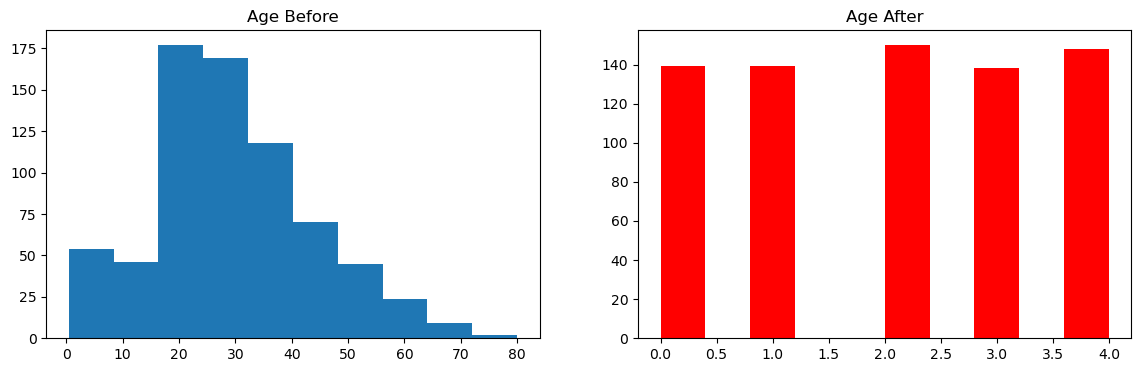

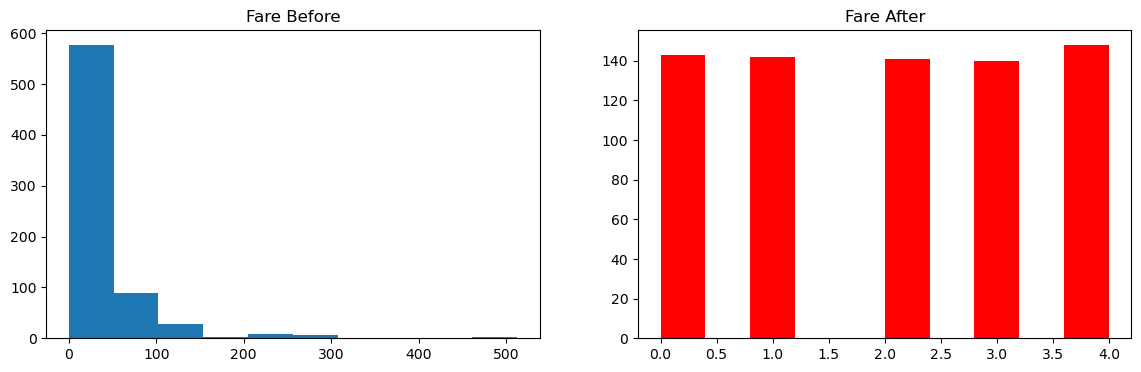

In [53]:
dicretize(5, 'quantile')  # best for skewed data


0.6330594679186229


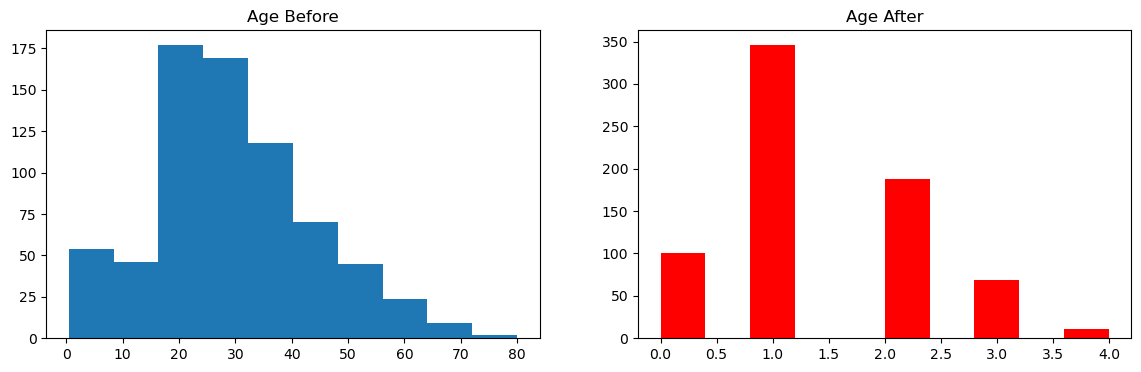

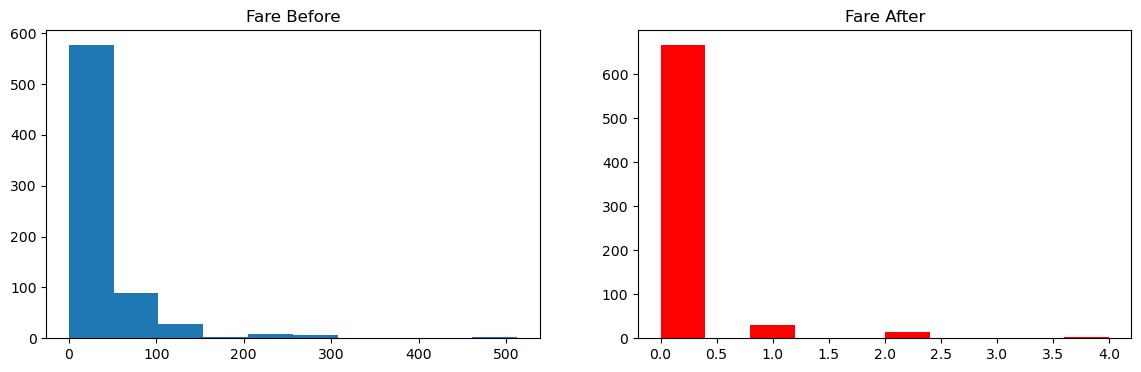

In [52]:

dicretize(5, 'uniform')    # simple equal-width bins


C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6723982785602504


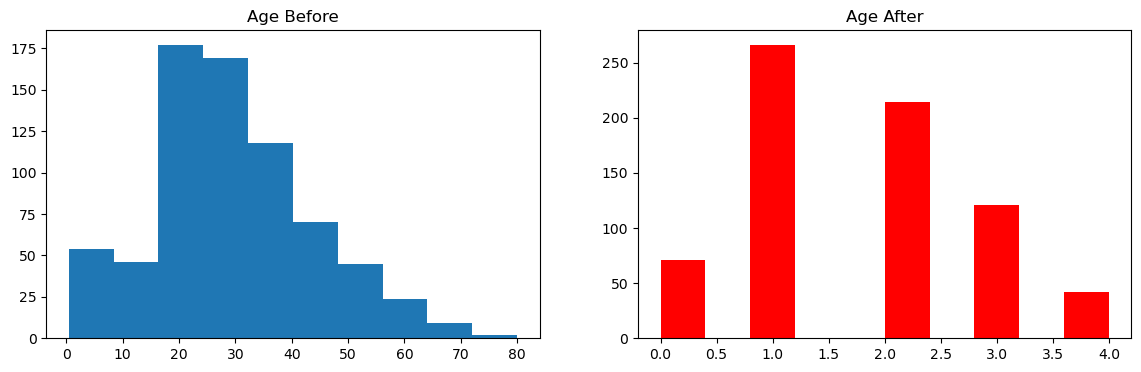

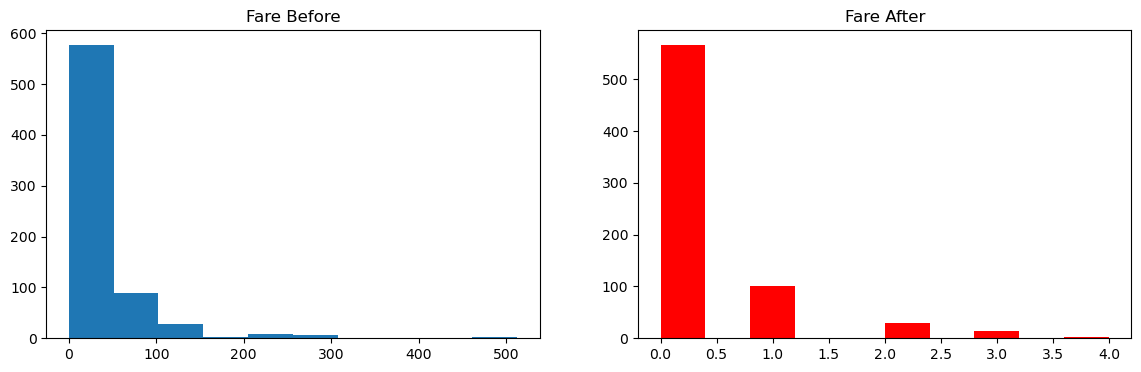

In [55]:
dicretize(5,'kmeans')